<a href="https://colab.research.google.com/github/rubenesticesi/ExtraccionData/blob/main/S3_02_DecisionStump_Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

---

## **Parte 1: Decision Stump - El Modelo Más Simple**  

### **1.1 ¿Qué es un Decision Stump?**  
Un **Decision Stump** es un árbol de decisión con solo **una división binaria** (un nodo raíz y dos hojas). Es el modelo más básico en ML y se usa como "weak learner" (aprendiz débil) en métodos como AdaBoost.  

**Hiperparámetros clave:**  
- `max_depth=1` → Obliga a que sea un stump.  
- `criterion="gini"` o `"entropy"` → Métrica para la división.  

**Ejemplo cotidiano:**  
- **Problema:** Clasificar si una persona es apta para un crédito basado en **un solo criterio** (ej: "¿Ingresos > $3000?").  
- **Limitación:** Es demasiado simple para problemas complejos, pero útil en ensambles.  


### **1.2 Implementación en Python**  


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Datos: [Ingresos_mensuales]
X = [[2000], [3500], [4000], [2500]]
y = ["Rechazado", "Aprobado", "Aprobado", "Rechazado"]

# Decision Stump (árbol con profundidad máxima = 1)
stump = DecisionTreeClassifier(max_depth=1, criterion="gini")
stump.fit(X, y)

# Predicción
print(stump.predict([[3000]]))  # ¿Aprobado o rechazado?

['Rechazado']



## **Parte 2: Transición a AdaBoost**  

### **2.1 ¿Por qué AdaBoost necesita Stumps?**  
AdaBoost (**Adaptive Boosting**) mejora modelos débiles (como stumps) combinándolos secuencialmente, dando más peso a las muestras mal clasificadas.  

**Fases de AdaBoost:**  
1. Entrena un **stump** en los datos.  
2. Asigna más peso a las muestras mal clasificadas.  
3. Entrena un nuevo stump enfocado en esos casos difíciles.  
4. Repite y combina todos los stumps con votación ponderada.  

**Hiperparámetros clave en AdaBoost:**  
| Parámetro          | Descripción | Valores típicos |  
|--------------------|------------|----------------|  
| `n_estimators`     | Número de stumps | 50-200 |  
| `learning_rate`    | Peso de cada stump | 0.1-1.0 |  
| `algorithm`        | "SAMME" (clasificación) o "SAMME.R" (probabilístico) | SAMME/SAMME.R |  

### **2.2 Implementación de AdaBoost con Stumps**  

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost con 50 stumps
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner (stump)
    n_estimators=50,      # Número de stumps
    learning_rate=1.0,    # Peso de cada stump
    algorithm="SAMME"     # Versión discreta de AdaBoost
)
adaboost.fit(X, y)

# Predicción mejorada
print(adaboost.predict([[3000]]))

['Rechazado']


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [ ]:
# Búsqueda de hiperparámetros con GridSearchCV
from sklearn.model_selection import GridSearchCV
# Datos: [Ingresos_mensuales]
X = [[2000], [3500], [4000], [2500],[3100],[1000],[6000],[2400],[3700],[4200],[1600],[2000]]
y = ["Rechazado", "Aprobado", "Aprobado", "Rechazado","Aprobado", "Rechazado","Aprobado", "Rechazado","Aprobado","Aprobado", "Rechazado", "Rechazado"]


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(AdaBoostClassifier(algorithm="SAMME"), param_grid, cv=5)
grid_search.fit(X, y)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'learning_rate': 0.1, 'n_estimators': 50}


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

# **Ejemplo Práctico: Decision Stump y AdaBoost en Breast Cancer Dataset**

## **1. Carga y Exploración de Datos**


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0=Maligno, 1=Benigno

# Dividir en train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Filas en entrenamiento: {X_train.shape[0]}")
print(f"Filas en prueba: {X_test.shape[0]}")
print("\nPrimeras 5 muestras:\n")
X.head()

Filas en entrenamiento: 455
Filas en prueba: 114

Primeras 5 muestras:



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **2. Entrenamiento de un Decision Stump (Árbol de 1 Nivel)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar stump
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)

# Evaluar
y_pred_stump = stump.predict(X_test)
accuracy_stump = accuracy_score(y_test, y_pred_stump)

print(f"\nPrecisión del Decision Stump: {accuracy_stump:.2%}")
print("Característica usada para la división:", stump.tree_.feature[0])
print("Umbral de división:", stump.tree_.threshold[0])


Precisión del Decision Stump: 89.47%
Característica usada para la división: 7
Umbral de división: 0.05127999931573868


## **3. Mejora con AdaBoost (Ensemble de Stumps)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost con 100 stumps
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.8,
    random_state=42,
    algorithm="SAMME"
)
adaboost.fit(X_train, y_train)

# Evaluar
y_pred_boost = adaboost.predict(X_test)
accuracy_boost = accuracy_score(y_test, y_pred_boost)

print(f"\nPrecisión de AdaBoost: {accuracy_boost:.2%}")

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(



Precisión de AdaBoost: 96.49%


## **4. Análisis Comparativo**

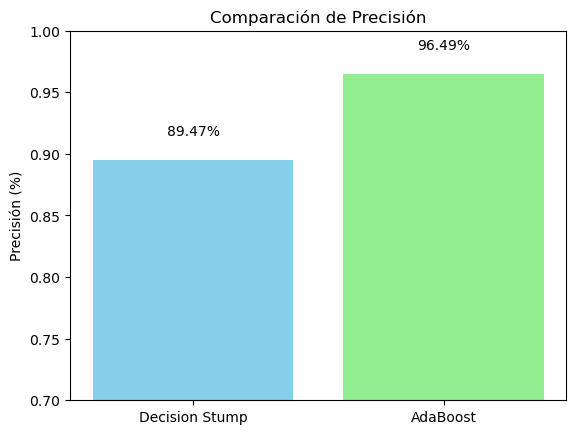

In [ ]:
import matplotlib.pyplot as plt

# Comparación visual
models = ['Decision Stump', 'AdaBoost']
accuracies = [accuracy_stump, accuracy_boost]

plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Comparación de Precisión')
plt.ylabel('Precisión (%)')
plt.ylim(0.7, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v+0.02, f"{v:.2%}", ha='center')
plt.show()

## **5. Optimización de Hiperparámetros**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir parámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Búsqueda grid
grid_search = GridSearchCV(
    AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        random_state=42,algorithm="SAMME"
    ),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor precisión: {grid_search.best_score_:.2%}")

/Users/prueba/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/prueba/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/prueba/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/prueba/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/prueba/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWa

/Users/prueba/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/prueba/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/prueba/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/prueba/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/prueba/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWa


Mejores parámetros encontrados:
{'learning_rate': 1.0, 'n_estimators': 50}
Mejor precisión: 98.02%


**Visualización de los primeros 3 Stumps:**

In [ ]:
for i, (feature, threshold) in enumerate(zip(
    adaboost.estimators_[0].tree_.feature,
    adaboost.estimators_[0].tree_.threshold
)):
    if i >= 3: break
    print(f"Stump {i+1}: Usa {data.feature_names[feature]} con umbral {threshold:.2f}")

Stump 1: Usa mean concave points con umbral 0.05
Stump 2: Usa worst symmetry con umbral -2.00
Stump 3: Usa worst symmetry con umbral -2.00
